# Women in Politics
## Exploring Factors Associated with Women's Representation in National Legislative Bodies
** Natasha Halfin**  
** DATA 512 - Human Centered Data Science**  
**University of Washington**  
**December 2020**  

## Table of Contents
1. [Introduction](#intro)
2. [Background and Related Work](#background)
3. [Research Question and Hypothesis](#rq)
4. [Data Selected for Analysis](#data)
5. [Methodology](#method)
6. [Analysis and Findings](#findings)
7. [Discussion](#discussion)
8. [Conclusion](#conclusion)

<a name="intro"/>

## Introduction
Although women have gained greater visibility and position across industries, representation in the political realm remains low. In fact in 2019, the [global median for women's representation in national legislative bodies was only 21%](#reference). Moreover, it is only in this year that we elected the first woman Vice President to the White House in the US. When our political bodies reflect the consituents they represent, they are more likely to support policies that are beneficial for a diverse population. Therefore, it is critical to understand why political representation of women remains low in many countries. Political office is a particularly difficult role that presents more challenges than the typical occupation. Hence, if there are barriers to entry, like lack of maternity leave, lower pay, etc., this may keep women from being able to pursue these types of positions, further perpetuating a vicious cycle. Through this analysis, I aimed to uncover relationships that may show a positive association between broader gender parity indicators and representation of women in national political bodies.

<span id="background"/>

## Background and Related Work

Plenty of literature speaks to the phenomenon of unequivalent representation of women in politics. For instance, [CNBC shared that the US ranked 75th globally in women's representation in government as of 2019](https://www.cnbc.com/2019/03/04/the-us-ranks-75th-in-womens-representation-in-government.html).
There is also substantial work demonstrating the positive impact from greater participation of women in political bodies. For instance, the Centre for Social and Economic Progress (formerly the Brookings Institution of India) explains that [women representation in Indian government leads to improved economic performance and health outcomes for women constituents](https://www.brookings.edu/blog/up-front/2019/09/04/womens-political-participation-and-development/).

The purpose of this analysis though is to focus on which factors both block and enable women in the journey to even enter the political realm. According to the [Carnegie Endowment for International Peace](https://carnegieendowment.org/2018/02/20/tackling-women-s-underrepresentation-in-u.s.-politics-comparative-perspectives-from-europe-pub-75315
), women perform just as well as men or better in election races in the US. However, they are less likely to run to begin with due to "gendered political opportunity structures and/or differences in gender socialization". The Carnegie Endowment cites greater domestic burdens faced by women and fundraising challenges as some of the many limiting factors. Furthemore, [Kira Sanbonmatsu's paper featured in the *Daedulus* journal](https://www.amacad.org/publication/womens-underrepresentation-us-congress) expands on the same themes, as well as the role of race and political representation structures in the US (which unlike most industrialized nations, does not follow a proportional representation system or utilize gender quotas).


Additionally, the [following research paper](https://www.researchgate.net/publication/327690671_Factors_affecting_Women's_Political_Participation_in_Lusaka_A_Case_Study_of_Kabwata_and_Munali_Constituencies) focuses on women's political participation in specific Zambian constituencies, but speaks to factors that are relevant globally. The authors Nsana and Kabubi discuss the role of socioeconomic, political, and cultural factors that can affect women's ability to participate in politics. To begin with, the lower economic status of women globally means that when women do obtain discretionary income, they will usually first reinvest it into their household rather into a political campaign. Even those that do seek to run for office face barriers given the amount of fundraising required to mount a successful campaign. Additionally, access to education, particularly in developing nations, can impede women's ability to pursue careers in political office. Finally, gender and cultural norms can play a role in preventing women from seeking political office, as husbands may threaten divorce, and others may employ threats of intimidation and violence.

The authors of this study also cite that 30% representation of women in legislative bodies is the minimum needed in order to achieve critical mass and policy impact. This figure comes from the [Beijing Declaration and Platform for Action](https://www.un.org/en/events/pastevents/pdfs/Beijing_Declaration_and_Platform_for_Action.pdf), which was adopted by the United Nations during its Fourth World Conference on Women in 1995. 

Based on the consistent themes in the literature that I reviewed, I chose features that are indicators of economic and societal parity for women. I also incorporated the concept of the critical mass threshold (30% representation of women) into my exploratory data analysis.


<span id="rq"/>

## Research Question and Hypothesis

**Research Question:  What factors are associated with countries with greater representation of women in politics?**

Specifically, I wanted to understand--what is the relationship between representation of women in politics and:
* Representation of women in the commercial sector?
* Laws and societal attitudes that affect women?

**Hypothesis: Countries with better performance across key gender parity indicators are more likely to have greater representation of women in politics.**


<span id = "data">

## Data Selected for Analysis
I utilize several datasets from the OECD website database, specifically the following sources:  
* [Gender, Institutions and Development Database (GID-DB) 2014](https://stats.oecd.org/Index.aspx?DataSetCode=GIDDB2019)
* [Gender, Institutions and Development Database (GID-DB) 2019](https://stats.oecd.org/Index.aspx?DataSetCode=GIDDB2014)
* [Employment dataset](https://stats.oecd.org/Index.aspx?DataSetCode=GENDER_EMP)

The GID-DB contains country level information reflecting a spectrum of indicators associated with gender, including land ownership by women, violence against women, and women political representation. The Employment dataset contains employment indicators like median wage gap, female share of managers, and length of maternity leave. 

### Data Limitations
While I originally hoped to join data from the GID-DB for each year to the Employment dataset (joining at the country and year level) and compare trends over time, I discovered that the features in the GID-DB were not all consistent between 2014 and 2019. Additionally, not all features in the Employment dataset were consistently populated across all the available years (including 2019). Therefore, I created a separate dataset for each year (2014 and 2019) and focused on different independent variables of interest that were available for that given year.

### Features Used
**2014 Dataset**  
* Median Gender Wage Gap 
* Female Share of Managers 
* Female Share of Board Seats
* Political Representation

**2019 Dataset**
* Access to Financial Services
* Divorce 
* Households Responsibilities Attitudes
* Reproductive Autonomy
* Violence Against Women
* Political Representation

Please see the [README](https://github.com/nhalfi/Women-in-Politics/blob/main/README.md) for a data dictonary on the above features.

### [Terms and Conditions for Use of the Data](http://www.oecd.org/termsandconditions/)

The terms and conditions state that I can use the data freely with a a citation. However, there are additional restrictions or license requirements in instances where the OECD is reporting from 3rd party sources. The datasets I used include data sourced directly from the OECD, as well as the United Nations, and UNICEF. The UN and UNICEF's Terms of Use allow usage of the data for non-commercial purposes, hence I was able to use these datasources freely for my analysis.

The datasets I used were suitable for my purposes because they contain datapoints across a variety of gender-related indicators for countries globally.

<span id="method"/>

## Methodology
My approach to this analysis consisted of two parts:  

**1. Descriptive statistical analysis, focusing on exploratory data analysis and correlations between feature pairs**   
**2. Evaluation of linear regression models to predict the share of women's political representation for a given country**  

For part 1, I measured the relationships between each independent variable and the outcome variable of women's political representation in each dataset. For part 2, I evaluated both an Ordinary Least Squares (OLS) regression model as well as a ridge regession model for each dataset of features. A regression model was a logical choice given that the datasets' features are all numeric and I wanted to predict a numerical value. Furthermore, I hoped to use findings from both parts of the anlysis to inform which gender parity indicators are most impactful for political representation of women.

<span id="findings"/>

## Analysis and Findings
### Part 0: Data Loading, Cleaning, and Preparation
#### Environment Setup
First, I need to import all necessary libraries/packages.

In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
import statsmodels.api as sm
import pandas_profiling

Next, I will load each of the files found in my Data/Raw Data directory.

In [328]:
df_GIDDB19 = pd.read_csv("Data/Raw Data/GIDDB2019_NH.csv",sep =",")
df_GIDDB14 = pd.read_csv("Data/Raw Data/GIDDB2014_NH.csv",sep =",")
df_EMP14 = pd.read_csv("Data/Raw Data/GENDER_EMP_2014.csv",sep =",")
df_GIDDB19.head()

,REGION,Region,LOCATION,Country,INC,Income,VAR,Variable,TIME,Year,Value,Flag Codes,Flags
0,ASI,Asia,AUS,Australia,HIN,High income,DF_HR_ATT,Attitudes,2019,2019,21.1,NaN,NaN
1,ASI,Asia,AUS,Australia,HIN,High income,DF_DV_LAW,Law,2019,2019,0.0,NaN,NaN
2,ASI,Asia,AUS,Australia,HIN,High income,RPI_VAW_PRACT,Practice,2019,2019,16.9,NaN,NaN
3,ASI,Asia,AUS,Australia,HIN,High income,RPI_RA_LAW,Law,2019,2019,0.0,NaN,NaN
4,ASI,Asia,AUS,Australia,HIN,High income,RAPFR_SAFS_LAW,Law,2019,2019,0.0,NaN,NaN


In [329]:
df_GIDDB14.head()

,REG,Region,LOCATION,Country,INC,Income group,VAR,Variables,TIME,Time,Value,Flag Codes,Flags
0,MENA,Middle East and North Africa,BHR,Bahrain,HIN,High income: nonOECD,FC_5,Divorce,2014,2014,1.00,NaN,NaN
1,MENA,Middle East and North Africa,BHR,Bahrain,HIN,High income: nonOECD,RR_4,Access to financial services,2014,2014,0.50,NaN,NaN
2,MENA,Middle East and North Africa,BHR,Bahrain,HIN,High income: nonOECD,RC_2_2,Political representation,2014,2014,0.10,NaN,NaN
3,ECA,Europe and Central Asia,HRV,Croatia,HIN,High income: nonOECD,FC_5,Divorce,2014,2014,0.00,NaN,NaN
4,ECA,Europe and Central Asia,HRV,Croatia,HIN,High income: nonOECD,RP_1_2,Prevalence of violence in the lifetime,2014,2014,0.13,NaN,NaN


In [330]:
df_EMP14.head()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,NLD,Netherlands,EMP18_MAT,Length of maternity leave,WOMEN,Women,TOTAL,Total,2014,2014,WEEK,Weeks,0,Units,NaN,NaN,16.0,NaN,NaN
1,NZL,New Zealand,EMP18_MAT,Length of maternity leave,WOMEN,Women,TOTAL,Total,2014,2014,WEEK,Weeks,0,Units,NaN,NaN,14.0,NaN,NaN
2,FIN,Finland,EMP18_MAT,Length of maternity leave,WOMEN,Women,TOTAL,Total,2014,2014,WEEK,Weeks,0,Units,NaN,NaN,17.5,NaN,NaN
3,GBR,United Kingdom,EMP18_MAT,Length of maternity leave,WOMEN,Women,TOTAL,Total,2014,2014,WEEK,Weeks,0,Units,NaN,NaN,52.0,NaN,NaN
4,TUR,Turkey,EMP18_MAT,Length of maternity leave,WOMEN,Women,TOTAL,Total,2014,2014,WEEK,Weeks,0,Units,NaN,NaN,16.0,NaN,NaN


Since some of the variable names are long, I will rename them to more friendly (shorter) names. I will do this for the 2019 GIDDB dataset first.

In [331]:
df_GIDDB19['VAR'] = df_GIDDB19['VAR'].replace(['DF_DV_LAW'],'Divorce')
df_GIDDB19['VAR'] = df_GIDDB19['VAR'].replace(['DF_HR_ATT'],'Household Responsibilities Attitudes')
df_GIDDB19['VAR'] = df_GIDDB19['VAR'].replace(['RPI_VAW_PRACT'],'Violence Against Women')
df_GIDDB19['VAR'] = df_GIDDB19['VAR'].replace(['RPI_RA_LAW'],'Reproductive Autonomy')
df_GIDDB19['VAR'] = df_GIDDB19['VAR'].replace(['RAPFR_SAFS_LAW'],'Access to Financial Services')
df_GIDDB19['VAR'] = df_GIDDB19['VAR'].replace(['RCL_PV_PRACT'],'Political Representation')

df_GIDDB19.head()


,REGION,Region,LOCATION,Country,INC,Income,VAR,Variable,TIME,Year,Value,Flag Codes,Flags
0,ASI,Asia,AUS,Australia,HIN,High income,Household Responsibilities Attitudes,Attitudes,2019,2019,21.1,NaN,NaN
1,ASI,Asia,AUS,Australia,HIN,High income,Divorce,Law,2019,2019,0.0,NaN,NaN
2,ASI,Asia,AUS,Australia,HIN,High income,Violence Against Women,Practice,2019,2019,16.9,NaN,NaN
3,ASI,Asia,AUS,Australia,HIN,High income,Reproductive Autonomy,Law,2019,2019,0.0,NaN,NaN
4,ASI,Asia,AUS,Australia,HIN,High income,Access to Financial Services,Law,2019,2019,0.0,NaN,NaN


Next, I will clean up the variable names in the 2014 GIDDB14 dataset and drop all indicators except for the Political Representation values. 

In [332]:
df_GIDDB14['VAR'] = df_GIDDB14['Variables'].replace('Political representation','Political Representation')
df_GIDDB14 = df_GIDDB14.rename(columns={"Time":"Year"})
df_GIDDB14 = df_GIDDB14[df_GIDDB14['VAR']=="Political Representation"]
df_GIDDB14.head()

,REG,Region,LOCATION,Country,INC,Income group,VAR,Variables,TIME,Year,Value,Flag Codes,Flags
2,MENA,Middle East and North Africa,BHR,Bahrain,HIN,High income: nonOECD,Political Representation,Political representation,2014,2014,0.10,NaN,NaN
6,ECA,Europe and Central Asia,HRV,Croatia,HIN,High income: nonOECD,Political Representation,Political representation,2014,2014,0.24,NaN,NaN
10,ECA,Europe and Central Asia,CYP,Cyprus,HIN,High income: nonOECD,Political Representation,Political representation,2014,2014,0.11,NaN,NaN
13,SSA,Sub-Saharan Africa,GNQ,Equatorial Guinea,HIN,High income: nonOECD,Political Representation,Political representation,2014,2014,0.12,NaN,NaN
19,MENA,Middle East and North Africa,KWT,Kuwait,HIN,High income: nonOECD,Political Representation,Political representation,2014,2014,0.06,NaN,NaN


Lastly, I will rename columns in the Employment dataframe.

In [333]:
df_EMP14['Indicator'] = df_EMP14['Indicator'].replace(['Female share of seats on boards of the largest publicly listed companies','Share of female managers','Length of maternity leave','Gender wage gap at median'],['Female Share of Board Seats','Female Share of Managers','Length of Maternity Leave','Median Gender Wage Gap'])
df_EMP14 = df_EMP14.rename(columns={"Time":"Year"})
df_EMP14.head()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,NLD,Netherlands,EMP18_MAT,Length of Maternity Leave,WOMEN,Women,TOTAL,Total,2014,2014,WEEK,Weeks,0,Units,NaN,NaN,16.0,NaN,NaN
1,NZL,New Zealand,EMP18_MAT,Length of Maternity Leave,WOMEN,Women,TOTAL,Total,2014,2014,WEEK,Weeks,0,Units,NaN,NaN,14.0,NaN,NaN
2,FIN,Finland,EMP18_MAT,Length of Maternity Leave,WOMEN,Women,TOTAL,Total,2014,2014,WEEK,Weeks,0,Units,NaN,NaN,17.5,NaN,NaN
3,GBR,United Kingdom,EMP18_MAT,Length of Maternity Leave,WOMEN,Women,TOTAL,Total,2014,2014,WEEK,Weeks,0,Units,NaN,NaN,52.0,NaN,NaN
4,TUR,Turkey,EMP18_MAT,Length of Maternity Leave,WOMEN,Women,TOTAL,Total,2014,2014,WEEK,Weeks,0,Units,NaN,NaN,16.0,NaN,NaN


Next, I will streamline my dataframes to keep only the columns of interest to me.

In [334]:
df_GIDDB19 = df_GIDDB19[['Country','VAR','Year','Value']]
df_GIDDB19.head()

,Country,VAR,Year,Value
0,Australia,Household Responsibilities Attitudes,2019,21.1
1,Australia,Divorce,2019,0.0
2,Australia,Violence Against Women,2019,16.9
3,Australia,Reproductive Autonomy,2019,0.0
4,Australia,Access to Financial Services,2019,0.0


In [335]:
df_GIDDB14 = df_GIDDB14[['Country','VAR','Year','Value']]
df_GIDDB14.head()

,Country,VAR,Year,Value
2,Bahrain,Political Representation,2014,0.10
6,Croatia,Political Representation,2014,0.24
10,Cyprus,Political Representation,2014,0.11
13,Equatorial Guinea,Political Representation,2014,0.12
19,Kuwait,Political Representation,2014,0.06


In [336]:
df_EMP14 = df_EMP14[['Country','Indicator','Year','Value']]
df_EMP14.head()

,Country,Indicator,Year,Value
0,Netherlands,Length of Maternity Leave,2014,16.0
1,New Zealand,Length of Maternity Leave,2014,14.0
2,Finland,Length of Maternity Leave,2014,17.5
3,United Kingdom,Length of Maternity Leave,2014,52.0
4,Turkey,Length of Maternity Leave,2014,16.0


Next, I need to pivot my dataframes because the variables/indicators are currently stored as individuals rows, but I would like to represent each one as a column.

In [337]:
df_GIDDB19_pivot = pd.pivot_table(df_GIDDB19,values='Value', columns = 'VAR',index = ['Country','Year'])
df_GIDDB19_pivot.head()

,VAR,Access to Financial Services,Divorce,Household Responsibilities Attitudes,Political Representation,Reproductive Autonomy,Violence Against Women
Country,Year,,,,,,
Afghanistan,2019,0.25,1.00,NaN,27.7,0.75,60.8
Albania,2019,0.25,0.25,NaN,27.9,0.00,24.6
Algeria,2019,0.25,1.00,75.1,25.8,0.75,NaN
Angola,2019,0.25,0.50,NaN,30.5,0.00,34.8
Antigua and Barbuda,2019,0.25,0.00,NaN,11.1,0.75,NaN


In [338]:
df_GIDDB14_pivot = pd.pivot_table(df_GIDDB14,values='Value', columns = 'VAR',index = ['Country','Year'])
df_GIDDB14_pivot.head()

,VAR,Political Representation
Country,Year,
Afghanistan,2014,0.28
Albania,2014,0.18
Algeria,2014,0.32
Angola,2014,0.34
Argentina,2014,0.37


In [339]:
df_EMP14_pivot = pd.pivot_table(df_EMP14,values='Value',columns='Indicator',index = ['Country','Year'])
df_EMP14_pivot.head()

,Indicator,Female Share of Board Seats,Female Share of Managers,Length of Maternity Leave,Median Gender Wage Gap
Country,Year,,,,
Australia,2014,NaN,36.0,6.0,15.4
Austria,2014,17.1,29.9,16.0,17.7
Belgium,2014,22.4,31.3,15.0,3.3
Brazil,2014,NaN,37.3,NaN,NaN
Canada,2014,NaN,35.4,17.0,19.2


Now that I  have transformed my dataframes into a tidy format, I am ready to clean and join as needed. I will use the 2019 GIDDB dataframe as a standalone dataset, and join the 2014 GIDDB dataframe to the Employment dataframe to create a joined 2014 dataset.

First, I will join the GIDDB 2014 dataframe to the Employment dataframe, using country and year as the unique keys.

In [340]:
df_join14 = df_EMP14_pivot.merge(df_GIDDB14_pivot,how = 'inner',on = ['Country','Year'])
df_join14.head()

,,Female Share of Board Seats,Female Share of Managers,Length of Maternity Leave,Median Gender Wage Gap,Political Representation
Country,Year,,,,,
Australia,2014,NaN,36.0,6.0,15.4,0.26
Austria,2014,17.1,29.9,16.0,17.7,0.33
Belgium,2014,22.4,31.3,15.0,3.3,0.38
Brazil,2014,NaN,37.3,NaN,NaN,0.09
Canada,2014,NaN,35.4,17.0,19.2,0.25


Next, I will create copies of the dataframes and check if either of them have null values. I will do this for the 2019 dataset first.

In [341]:
df_19_final = df_GIDDB19_pivot.copy()
df_19_final.head()

,VAR,Access to Financial Services,Divorce,Household Responsibilities Attitudes,Political Representation,Reproductive Autonomy,Violence Against Women
Country,Year,,,,,,
Afghanistan,2019,0.25,1.00,NaN,27.7,0.75,60.8
Albania,2019,0.25,0.25,NaN,27.9,0.00,24.6
Algeria,2019,0.25,1.00,75.1,25.8,0.75,NaN
Angola,2019,0.25,0.50,NaN,30.5,0.00,34.8
Antigua and Barbuda,2019,0.25,0.00,NaN,11.1,0.75,NaN


In [342]:
for column in df_19_final:
    print(column,df_19_final[column].isna().sum())

Access to Financial Services 0
Divorce 0
Household Responsibilities Attitudes 100
Political Representation 0
Reproductive Autonomy 0
Violence Against Women 45


The 2019 dataset is missing values for over half the records for Household Responsiblities Attitudes, and about one quarter of all records for Violence Against Women.

Now, I will check the joined 2014 dataframe for any null values.

In [343]:
df_14_final = df_join14.copy()
df_14_final.head()

,,Female Share of Board Seats,Female Share of Managers,Length of Maternity Leave,Median Gender Wage Gap,Political Representation
Country,Year,,,,,
Australia,2014,NaN,36.0,6.0,15.4,0.26
Austria,2014,17.1,29.9,16.0,17.7,0.33
Belgium,2014,22.4,31.3,15.0,3.3,0.38
Brazil,2014,NaN,37.3,NaN,NaN,0.09
Canada,2014,NaN,35.4,17.0,19.2,0.25


In [344]:
for column in df_14_final:
    print(column, df_14_final[column].isna().sum())

Female Share of Board Seats 18
Female Share of Managers 0
Length of Maternity Leave 10
Median Gender Wage Gap 7
Political Representation 0


Three columns contain null values for at least some records.

Given that both datasets have null values, I will create imputed values using the mean value of the column to replace any null values. First, I will calculate the means and create imputed values for the 2014 dataset.

In [345]:
board_seats = np.mean(df_14_final['Female Share of Board Seats'])
mat_leave = np.mean(df_14_final['Length of Maternity Leave'])
wage_gap = np.mean(df_14_final['Median Gender Wage Gap'])
df_14_final['Female Share of Board Seats'].fillna(board_seats, inplace = True)
df_14_final['Length of Maternity Leave'].fillna(mat_leave,inplace=True)
df_14_final['Median Gender Wage Gap'].fillna(wage_gap,inplace=True)
df_14_final.head()


,,Female Share of Board Seats,Female Share of Managers,Length of Maternity Leave,Median Gender Wage Gap,Political Representation
Country,Year,,,,,
Australia,2014,20.1,36.0,6.000000,15.400000,0.26
Austria,2014,17.1,29.9,16.000000,17.700000,0.33
Belgium,2014,22.4,31.3,15.000000,3.300000,0.38
Brazil,2014,20.1,37.3,19.238235,13.716216,0.09
Canada,2014,20.1,35.4,17.000000,19.200000,0.25


Next, I will do the same for the 2019 dataset.

In [346]:
hh_attitudes = np.mean(df_19_final['Household Responsibilities Attitudes'])
violence = np.mean(df_19_final['Violence Against Women'])
df_19_final['Household Responsibilities Attitudes'].fillna(hh_attitudes, inplace = True)
df_19_final['Violence Against Women'].fillna(violence,inplace=True)
df_19_final.head()


,VAR,Access to Financial Services,Divorce,Household Responsibilities Attitudes,Political Representation,Reproductive Autonomy,Violence Against Women
Country,Year,,,,,,
Afghanistan,2019,0.25,1.00,44.86375,27.7,0.75,60.80
Albania,2019,0.25,0.25,44.86375,27.9,0.00,24.60
Algeria,2019,0.25,1.00,75.10000,25.8,0.75,28.98
Angola,2019,0.25,0.50,44.86375,30.5,0.00,34.80
Antigua and Barbuda,2019,0.25,0.00,44.86375,11.1,0.75,28.98


I notice that the values for Political Representation are encoded as a decimal in the 2014 dataset, but as a percentage value in the 2019 dataset. For the sake of consistency, I will modify the 2019 dataframe to encode this value as a decimal as well. I will also modify all column values in both datasets that reflect pecentages to be decimal values.

In [347]:
df_14_final['Female Share of Board Seats'] = (df_14_final['Female Share of Board Seats']/100).astype(float)
df_14_final['Female Share of Managers'] = (df_14_final['Female Share of Managers']/100).astype(float)
df_14_final['Median Gender Wage Gap'] = (df_14_final['Median Gender Wage Gap']/100).astype(float)
df_14_final.head()

,,Female Share of Board Seats,Female Share of Managers,Length of Maternity Leave,Median Gender Wage Gap,Political Representation
Country,Year,,,,,
Australia,2014,0.201,0.360,6.000000,0.154000,0.26
Austria,2014,0.171,0.299,16.000000,0.177000,0.33
Belgium,2014,0.224,0.313,15.000000,0.033000,0.38
Brazil,2014,0.201,0.373,19.238235,0.137162,0.09
Canada,2014,0.201,0.354,17.000000,0.192000,0.25


In [349]:
df_19_final['Political Representation'] = (df_19_final['Political Representation']/100).astype(float)
df_19_final['Household Responsibilities Attitudes'] = (df_19_final['Household Responsibilities Attitudes']/100).astype(float)
df_19_final['Violence Against Women'] = (df_19_final['Violence Against Women']/100).astype(float)
df_19_final.head()

,VAR,Access to Financial Services,Divorce,Household Responsibilities Attitudes,Political Representation,Reproductive Autonomy,Violence Against Women
Country,Year,,,,,,
Afghanistan,2019,0.25,1.00,0.448637,0.277,0.75,0.6080
Albania,2019,0.25,0.25,0.448637,0.279,0.00,0.2460
Algeria,2019,0.25,1.00,0.751000,0.258,0.75,0.2898
Angola,2019,0.25,0.50,0.448637,0.305,0.00,0.3480
Antigua and Barbuda,2019,0.25,0.00,0.448637,0.111,0.75,0.2898


Now that I have completed the data cleaning and transformation process, I will output the final datasets for each year.

In [350]:
df_19_final.to_csv('Data/Transformed Data/WIP2019.csv')
df_14_final.to_csv('Data/Transformed Data/WIP2014.csv')

### Part 1: Descriptive Analysis to Measure Correlation of Key Gender Parity Indicators to Representation of Women in Politics

#### Exploratory Data Analysis
Before I begin the primary descriptive analysis, I want to perform some exploratory data analysis (EDA) to understand the distribution of the data. I will begin by joining the Political Representation values for both 2014 and 2019 to compare how they have shifted over time. I will do this first for OECD countries only, and then for all countries that were surveyed in both years (some countries that only had responses in 2019 may be excluded.)

Because df_14_final only contains records for OECD countries, I can perform an inner join on my 2019 dataset to create an OECD only subset for both years.

In [351]:
df_poli_rep = df_19_final.merge(df_14_final['Political Representation'],on='Country')
df_poli_rep.head()

,Access to Financial Services,Divorce,Household Responsibilities Attitudes,Political Representation_x,Reproductive Autonomy,Violence Against Women,Political Representation_y
Country,,,,,,,
Australia,0.0,0.0,0.211,0.287,0.0,0.169,0.26
Austria,0.0,0.0,0.583,0.344,0.0,0.130,0.33
Belgium,0.0,0.0,0.320,0.380,0.0,0.240,0.38
Brazil,0.0,0.0,0.604,0.107,0.5,0.335,0.09
Canada,0.0,0.0,0.277,0.270,0.0,0.019,0.25


For the full spectrum of countries, I will join the 2019 dataset to the GIDDB14 pivoted dataframe (which contains observations for both OECD and non-OECD countries).

In [352]:
df_poli_rep2 = df_19_final.merge(df_GIDDB14_pivot['Political Representation'],on='Country')
df_poli_rep2.head()

,Access to Financial Services,Divorce,Household Responsibilities Attitudes,Political Representation_x,Reproductive Autonomy,Violence Against Women,Political Representation_y
Country,,,,,,,
Afghanistan,0.25,1.00,0.448637,0.277,0.75,0.6080,0.28
Albania,0.25,0.25,0.448637,0.279,0.00,0.2460,0.18
Algeria,0.25,1.00,0.751000,0.258,0.75,0.2898,0.32
Angola,0.25,0.50,0.448637,0.305,0.00,0.3480,0.34
Argentina,0.00,0.00,0.677000,0.389,0.50,0.2898,0.37


Next, I will rename columns in both dataframes to clearly indicate which year the Political Representation value pertains to.

In [353]:
df_poli_rep = df_poli_rep.rename(columns={"Political Representation_x":"2019","Political Representation_y":"2014"})
df_poli_rep = df_poli_rep[['2019','2014']]
df_poli_rep.head()

,2019,2014
Country,,
Australia,0.287,0.26
Austria,0.344,0.33
Belgium,0.380,0.38
Brazil,0.107,0.09
Canada,0.270,0.25


In [354]:
df_poli_rep2 = df_poli_rep2.rename(columns={"Political Representation_x":"2019","Political Representation_y":"2014"})
df_poli_rep2 = df_poli_rep2[['2019','2014']]
df_poli_rep2.head()

,2019,2014
Country,,
Afghanistan,0.277,0.28
Albania,0.279,0.18
Algeria,0.258,0.32
Angola,0.305,0.34
Argentina,0.389,0.37


I need to now unpivot to transform the individual year columns into rows.

In [355]:
df_poli_rep = df_poli_rep.melt(id_vars=None,value_vars=['2019','2014'],var_name = 'Year',value_name='Political Representation')
df_poli_rep.head()

,Year,Political Representation
0,2019,0.287
1,2019,0.344
2,2019,0.380
3,2019,0.107
4,2019,0.270


In [356]:
df_poli_rep2 = df_poli_rep2.melt(id_vars=None,value_vars=['2019','2014'],var_name = 'Year',value_name='Political Representation')
df_poli_rep2.head()

,Year,Political Representation
0,2019,0.277
1,2019,0.279
2,2019,0.258
3,2019,0.305
4,2019,0.389


Next, I will convert the Year column into a datetime data type.

In [357]:
df_poli_rep['Year']=pd.to_datetime(df_poli_rep['Year'],format = '%Y')
df_poli_rep['Year'] = pd.DatetimeIndex(df_poli_rep['Year']).year
df_poli_rep.head()

,Year,Political Representation
0,2019,0.287
1,2019,0.344
2,2019,0.380
3,2019,0.107
4,2019,0.270


In [358]:
df_poli_rep2['Year']=pd.to_datetime(df_poli_rep2['Year'],format = '%Y')
df_poli_rep2['Year'] = pd.DatetimeIndex(df_poli_rep2['Year']).year
df_poli_rep2.head()

,Year,Political Representation
0,2019,0.277
1,2019,0.279
2,2019,0.258
3,2019,0.305
4,2019,0.389


I will compare the distribution of political representation between 2014 and 2019 within the cohort of OECD countries, and then all countries that were surveyed in the dataset.

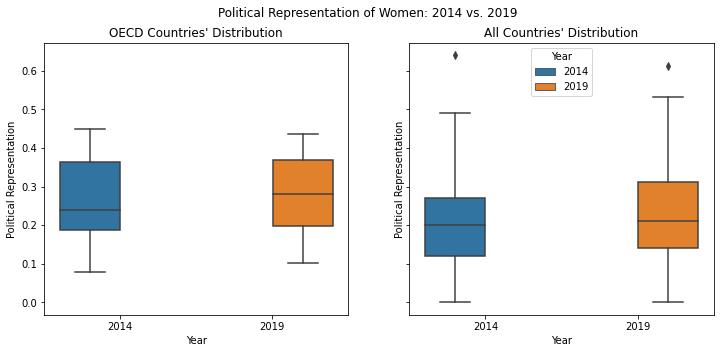

		OECD Countries	All Countries
Mean 2014:	 0.26 		 0.21
Median 2014:	 0.24 		 0.2
Mean 2019:	 0.28 		 0.23
Median 2019:	 0.28 		 0.21


In [359]:
#plot figures
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True, figsize =(12,5))
plot1 = sns.boxplot(x = 'Year', y='Political Representation', hue = 'Year',data = df_poli_rep,ax=ax1)
plot2 = sns.boxplot(x = 'Year', y='Political Representation', hue = 'Year',data = df_poli_rep2,ax = ax2)
ax2.legend(loc = "upper center",title = "Year")
ax1.legend(loc = "upper center",title = "Year",bbox_to_anchor = (1.3,0.5))
ax1.set_title("OECD Countries' Distribution")
ax2.set_title("All Countries' Distribution")
fig.suptitle("Political Representation of Women: 2014 vs. 2019")
plt.show()

#show summary statistics
print("\t\tOECD Countries\tAll Countries")
print("Mean 2014:\t",np.around(np.mean(df_poli_rep.loc[df_poli_rep['Year']==2014,"Political Representation"]),decimals=2),"\t\t",np.around(np.mean(df_poli_rep2.loc[df_poli_rep2['Year']==2014,"Political Representation"]),decimals=2))
print("Median 2014:\t",np.around(np.median(df_poli_rep.loc[df_poli_rep['Year']==2014,"Political Representation"]),decimals=2),"\t\t",np.around(np.median(df_poli_rep2.loc[df_poli_rep2['Year']==2014,"Political Representation"]),decimals=2))
print("Mean 2019:\t",np.around(np.mean(df_poli_rep.loc[df_poli_rep['Year']==2019,"Political Representation"]),decimals=2),"\t\t",np.around(np.mean(df_poli_rep2.loc[df_poli_rep2['Year']==2019,"Political Representation"]),decimals=2))
print("Median 2019:\t",np.around(np.median(df_poli_rep.loc[df_poli_rep['Year']==2019,"Political Representation"]),decimals=2),"\t\t",np.around(np.median(df_poli_rep2.loc[df_poli_rep2['Year']==2019,"Political Representation"]),decimals=2))

Looking at the distribution of political representation for OECD countries in 2014, the mean representation is 26% with a median of 24%. The boxplot illustrates that the distribution is skewed since the 3rd quartile has a larger range than the 2nd quartile.
When we compare to the 2019 distribution, both the mean and median have increased by several points, and the minimum has shifted slightly upwards as well. Furthermore, the distribution is much more even in 2019.  

The full population of countries shows lower mean and median values of 21% and 20% respectively. While the mean grew by 2 points in the larger cohort as well, the median only grew by 1 point, compared to 4 points in the OECD population. We can also observe a wider range of values in the full country distributions.

I am also curious to know how many countries hit the treshold of "critical mass" defined earlier (30% political representation by women). I will create a calculated column with a flag that assesses this criteria.

In [360]:
df_poli_rep['Critical Mass'] =  np.where(df_poli_rep['Political Representation']>=0.3, 'Yes', 'No')
df_poli_rep.head()

,Year,Political Representation,Critical Mass
0,2019,0.287,No
1,2019,0.344,Yes
2,2019,0.380,Yes
3,2019,0.107,No
4,2019,0.270,No


In [361]:
df_poli_rep2['Critical Mass'] =  np.where(df_poli_rep2['Political Representation']>=0.3, 'Yes', 'No')
df_poli_rep2.head()

,Year,Political Representation,Critical Mass
0,2019,0.277,No
1,2019,0.279,No
2,2019,0.258,No
3,2019,0.305,Yes
4,2019,0.389,Yes


Next, I will plot a histogram by year and critical mass category and create a frequency table for reference.

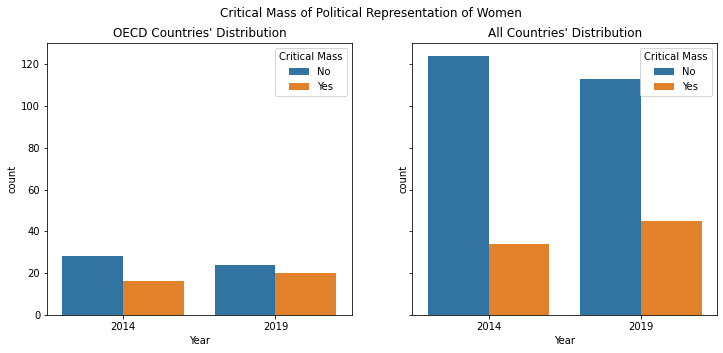

OECD Countries

Critical Mass  No  Yes
Year                  
2014           28   16
2019           24   20 

All Countries

Critical Mass   No  Yes
Year                   
2014           124   34
2019           113   45


In [362]:
#plot figures
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True, figsize =(12,5))
plot1 = sns.countplot(x='Year',data = df_poli_rep,hue = 'Critical Mass',ax=ax1)
plot2 = sns.countplot(x='Year',data = df_poli_rep2,hue = 'Critical Mass',ax=ax2)
ax1.title.set_text("OECD Countries' Distribution")
ax2.title.set_text("All Countries' Distribution")
fig.suptitle("Critical Mass of Political Representation of Women")
plt.show()

#print frequency tables
print("OECD Countries\n")
print(pd.crosstab(df_poli_rep['Year'],df_poli_rep['Critical Mass']),"\n")
print("All Countries\n")
print(pd.crosstab(df_poli_rep2['Year'],df_poli_rep2['Critical Mass']))

The number of OECD countries with a critical mass of women representation (at least 30%) in legislatures increased by around 27% between 2014 and 2019. However, nearly 56% of the countries represented in the dataset still fall below this threshold as of 2019. Although the critical mass of women representation in all countries increased by 32% between 2014 and 2019, nearly 72% of the countries surveyed in both years still fail to meet this criteria as of 2019. Unsurprisingly, the ratio is a bit more balanced in the OECD cohort.

#### Evaluating Correlation
Next, I want to visually examine each independent feature's relationship to the outcome variable, Political Representation, by plotting the individual pair relationships.  

 I will use [the following guidelines](https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c) the measure the strength of correlation:
   
1–0.8 → Very strong  
0.799–0.6 → Strong  
0.599–0.4 → Moderate  
0.399–0.2 → Weak  
0.199–0 → Very Weak  

As  reference, the correlation matrix for the 2014 dataset features is below.

In [363]:
corr_2014 = df_14_final.corr()
corr_2014

,Female Share of Board Seats,Female Share of Managers,Length of Maternity Leave,Median Gender Wage Gap,Political Representation
Female Share of Board Seats,1.000000,0.186420,-0.230194,-0.012394,0.469044
Female Share of Managers,0.186420,1.000000,0.017884,-0.233954,0.139275
Length of Maternity Leave,-0.230194,0.017884,1.000000,-0.111332,-0.231154
Median Gender Wage Gap,-0.012394,-0.233954,-0.111332,1.000000,-0.216755
Political Representation,0.469044,0.139275,-0.231154,-0.216755,1.000000


First, I will look at Female Share of Board Seats vs. Political Representation.

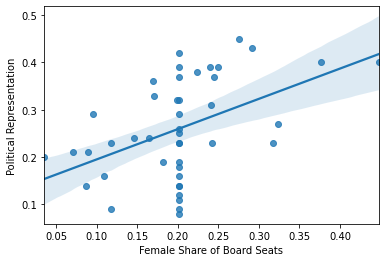

In [364]:
sns.regplot(df_14_final['Female Share of Board Seats'],df_14_final['Political Representation'])
plt.show()

While there does appear to be a positive association between Female Share of Board seats and Political Representation, the value is 0.47, which is considered moderate. Additionally, the imputed values I added earlier may be causing some noise given the concentration of observations areound the 20% mark.

Next, I will examine Female Share of Managers vs. Political Representation.

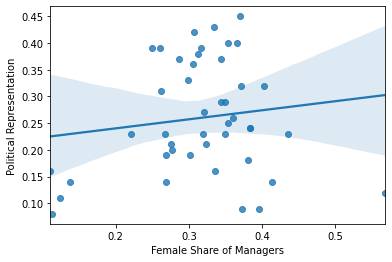

In [365]:
sns.regplot(df_14_final['Female Share of Managers'],df_14_final['Political Representation'])
plt.show()

The correlation between these two variables is 0.19, which is considered very weak. As we can see in the plot, there is a wide spread across observations.

Next, let's examine the Length of Maternity Leave vs. Political Representation.

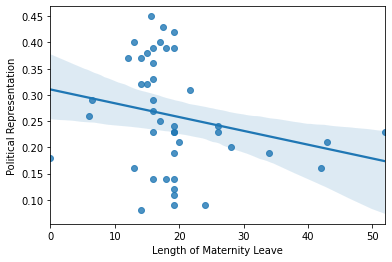

In [366]:
sns.regplot(df_14_final['Length of Maternity Leave'],df_14_final['Political Representation'])
plt.show()

Counter to what I would have expected, there appears to be a weak negative correlation (-0.23) between maternity leave length and political representation. 

Finally, let's look at the relationship between the Median Gender Wage Gap and Political Representation.

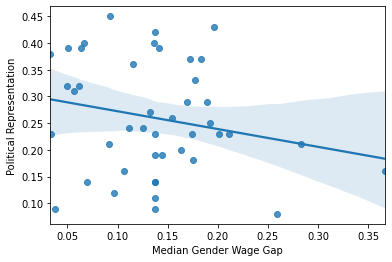

In [367]:
sns.regplot(df_14_final['Median Gender Wage Gap'],df_14_final['Political Representation'])
plt.show()

Contrary to my intuition, the correlation between these variables is weak (-0.22). 

#### 2014 Dataset Summary
The strongest correlation to Political Representation in this dataset group is with the Female Share of Board Seats (0.47). Overall, the relationships I examined above appear to be weak.

Now I will move on to examining the correlations within the 2019 dataset. Below is the correlation matrix for reference.

In [368]:
corr_2019 = df_19_final.corr()
corr_2019

VAR,Access to Financial Services,Divorce,Household Responsibilities Attitudes,Political Representation,Reproductive Autonomy,Violence Against Women
VAR,,,,,,
Access to Financial Services,1.000000,0.229696,0.119260,-0.148501,0.278490,0.223355
Divorce,0.229696,1.000000,0.336904,-0.301835,0.441796,0.223627
Household Responsibilities Attitudes,0.119260,0.336904,1.000000,-0.280369,0.203219,0.131722
Political Representation,-0.148501,-0.301835,-0.280369,1.000000,-0.296487,-0.010493
Reproductive Autonomy,0.278490,0.441796,0.203219,-0.296487,1.000000,0.303594
Violence Against Women,0.223355,0.223627,0.131722,-0.010493,0.303594,1.000000


First, I will review Access to Financial Services vs. Political Representation.

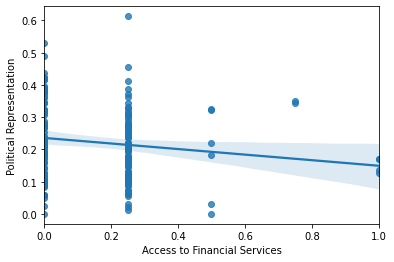

In [369]:
sns.regplot(df_19_final['Access to Financial Services'],df_19_final['Political Representation'])
plt.show()

There is a very weak negative correlation between these variables (-0.15). Even though there are 4 possibles values for Access to Financial Services on the 0.25 point scale, most countries had a score of 0 or 0.25. There is a wide range of scores for Political Representation within these two groups.

Next, I will examine Divorce vs. Political Representation.

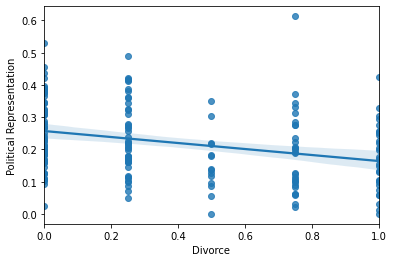

In [370]:
sns.regplot(df_19_final['Divorce'],df_19_final['Political Representation'])
plt.show()

The correlation between Divorce and Political Representation is weak (-0.30), and at each level of Divorce law equity, there is a significant range of political representation.

Next, I will inspect Household Responsibilities Attitudes (the percentage of the population agreeing or agreeing strongly that "when a mother works for pay, the children suffer) vs. Political Representation.

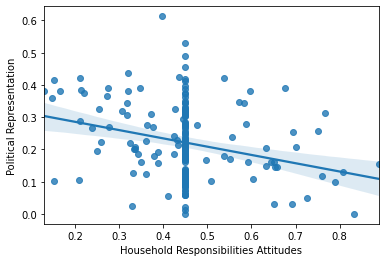

In [371]:
sns.regplot(df_19_final['Household Responsibilities Attitudes'],df_19_final['Political Representation'])
plt.show()

There is a weak negative correlation between these two variables (-0.28). Also, we can see substantial spread across the observations in the plot.

Next, let's inspect Reproductive Autonomy. vs. Political Representation.

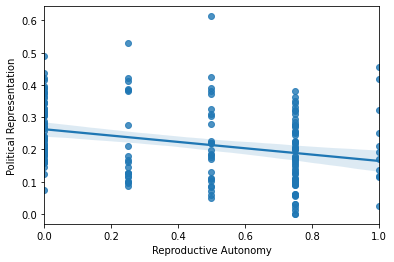

In [372]:
sns.regplot(df_19_final['Reproductive Autonomy'],df_19_final['Political Representation'])
plt.show()

The correlation between these variables is weak (-0.30). Within each reproductive autonomy score, 0 being the most favorable to women and 1 being least favorable, there is a significant spread across rates of political representation. 

Finally, I will look at Violence Against Women vs. Political Representation.

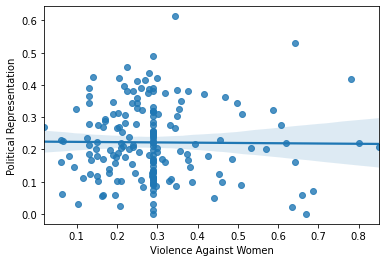

In [373]:
sns.regplot(df_19_final['Violence Against Women'],df_19_final['Political Representation'])
plt.show()

There does not seem to be a relationship here, as demonstrated by the plot and the very weak correlation value (-0.01). The key takeaway unfortunately is that violence against women is pervasive, regardless of the representation of women in politics.

#### 2019 Dataset Summary
The strongest correlation to Political Representation in this dataset lies with Divorce and Reproductive Autonomy (both around -0.3). However, generally most relationships are again weak in the 2019 dataset.

### Part 2: Linear Regression Model to Predict Representation of Women in Politics
Despite the weak correlations I uncovered in Part 1, I want to see how effective a linear regression model (constructed from the features in my datasets) will be in predicting the share of Political Representation held by women in a given country. To do so, I will construct a separate model for the different features in each year's dataset (2014 and 2019). I will also compare the performance of Ordinary Least Squares regression models to models generated with Ridge Regression.

First, I will construct an Ordinary Least Squares regression model for each dataset to observe summary statistics.

In [374]:
import statsmodels.api as sm
#Split X from Y
x_14 = df_14_final.drop('Political Representation', axis=1)
x_19 = df_19_final.drop('Political Representation', axis=1)
y_14 = df_14_final['Political Representation']
y_19 = df_19_final['Political Representation']

modelx_14 = sm.add_constant(x_14)
model_14 = sm.OLS(y_14,modelx_14)
results = model_14.fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Political Representation   R-squared:                       0.288
Model:                                  OLS   Adj. R-squared:                  0.215
Method:                       Least Squares   F-statistic:                     3.940
Date:                      Mon, 14 Dec 2020   Prob (F-statistic):            0.00883
Time:                              10:24:43   Log-Likelihood:                 44.836
No. Observations:                        44   AIC:                            -79.67
Df Residuals:                            39   BIC:                            -70.75
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

If we examine the R-squared value, a measure of goodness of fit, we see that it is quite low at 0.288. Additionally, the only variable with a statistically significant p-value (below or equal to 0.05) is the Female Share of Board Seats variable (p-value of 0.004). Furthermore, looking at the weights of the independent variable coefficients, most are not weighted substantially enough to individually affect political representation.

Next, let's repeat this exercise for the 2019 dataset.

In [375]:
modelx_19 = sm.add_constant(x_19)
model_19 = sm.OLS(y_19,modelx_19)
results = model_19.fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Political Representation   R-squared:                       0.172
Model:                                  OLS   Adj. R-squared:                  0.148
Method:                       Least Squares   F-statistic:                     7.219
Date:                      Mon, 14 Dec 2020   Prob (F-statistic):           3.63e-06
Time:                              10:24:43   Log-Likelihood:                 150.33
No. Observations:                       180   AIC:                            -288.7
Df Residuals:                           174   BIC:                            -269.5
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In this regression model, there is diminished statistical signficance compared to the 2014 model. Here we see an R-squared value of 0.17 (though this is still low), and smaller coefficient values for each independent variable. The two variables with statistically significant p-values are Household Responsibilities Attitudes and Reproductive Autonomy. 

Next I will compare the performance of an OLS regression and a ridge regression model trained on the OECD data. Typically, [ridge regression performs better than OLS](https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db) because it adds a penalty on the size of the coefficients with l2 regularization. However, I would still like to use OLS as a benchmark.

#### OLS Regression Predictions
I will first construct a model for the 2014 dataset. To begin, I need to split my data into training and test splits, and standardize and scale the input values.

In [376]:
#Train and test split
x_14_train, x_14_test, y_14_train, y_14_test = train_test_split(x_14, y_14, random_state=0)
x_19_train, x_19_test, y_19_train, y_19_test = train_test_split(x_19, y_19, random_state=0)

#Convert DataFrames to arrays
x_14_train = np.array(x_14_train)
x_14_test = np.array(x_14_test)
x_19_train = np.array(x_19_train)
x_19_test = np.array(x_19_test)

#Standardize+Scale
x_14_scaled_train = preprocessing.scale(x_14_train)
x_14_scaled_test = preprocessing.scale(x_14_test)
x_19_scaled_train = preprocessing.scale(x_19_train)
x_19_scaled_test = preprocessing.scale(x_19_test)

Now I am ready to train the model.

In [377]:
#train model on 2014 dataset
lm_14 = LinearRegression().fit(x_14_scaled_train,y_14_train)
print("Intercept:",lm_14.intercept_)
print("Coefficients:",lm_14.coef_)
print("R-squared:",lm_14.score(x_14_scaled_train,y_14_train))



Intercept: 0.23818181818181813
Coefficients: [ 0.04802323  0.00452117 -0.01107154 -0.02191708]
R-squared: 0.29340571849572317


Before I apply the model to the test set, I want to check how well the model performs on the training set by examining the RMSE (root mean squared error) and MAE (mean absolute error).

RMSE: 0.08613388010372497 
MAE: 0.07027262505187404


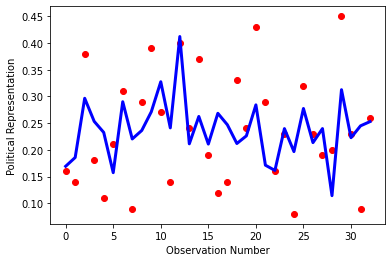

In [378]:
#generate predictions
lm_14_train_predictions = lm_14.predict(x_14_scaled_train)
rmse_train = mean_squared_error(y_14_train,lm_14_train_predictions,squared=False)
mae_train = mean_absolute_error(y_14_train,lm_14_train_predictions)
print("RMSE:",rmse_train,"\nMAE:",mae_train)

#plot predicted vs. actual
plt.plot(y_14_train.values, 'ro')
plt.plot(lm_14_train_predictions, color='blue', linewidth=3)
plt.xlabel('Observation Number')
plt.ylabel('Political Representation')
plt.show()

The MAE is 0.07 which means that on average, the percentage of women political represenation for a country was incorrectly predicted by 7pts. 

Next, I want to apply the model against the test set.

RMSE: 0.1094994527266135 
MAE: 0.09431214473982924


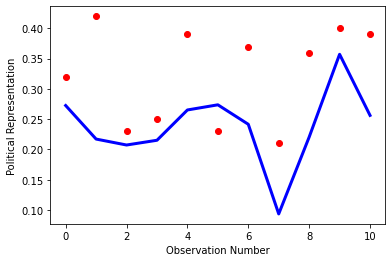

In [379]:
#generate predictions
lm_14_test_predictions = lm_14.predict(x_14_scaled_test)
rmse = mean_squared_error(y_14_test,lm_14_test_predictions,squared = False)
mae = mean_absolute_error(y_14_test,lm_14_test_predictions)
print("RMSE:",rmse,"\nMAE:",mae)

#plot predicted vs. actual
plt.plot(y_14_test.values, 'ro')
plt.plot(lm_14_test_predictions, color='blue', linewidth=3)
plt.xlabel('Observation Number')
plt.ylabel('Political Representation')
plt.show()

As is typical, the MAE and RMSE increased for the test set. The test predictions were incorrect by 9pts on average. 

Next, we can repeate the same steps for the 2019 dataset.

In [380]:
#fit model
lm_19 = LinearRegression().fit(x_19_scaled_train,y_19_train)
print("Intercept:",lm_19.intercept_)
print("Coefficients:",lm_19.coef_)
print("R-squared:",lm_19.score(x_19_scaled_train,y_19_train))

Intercept: 0.2204148148148148
Coefficients: [-0.00965856 -0.01090157 -0.03071158 -0.01688977  0.00840663]
R-squared: 0.1560117655269625


RMSE: 0.10705753138476778 
MAE: 0.08642651152967222


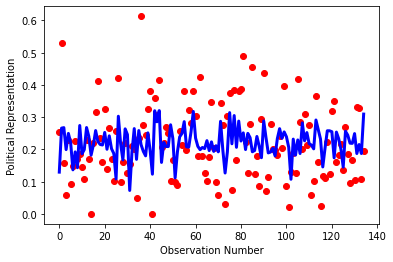

In [381]:
#generate predictions
lm_19_train_predictions = lm_19.predict(x_19_scaled_train)
rmse_train2 = mean_squared_error(y_19_train,lm_19_train_predictions,squared=False)
mae_train2 = mean_absolute_error(y_19_train,lm_19_train_predictions)
print("RMSE:",rmse_train2,"\nMAE:",mae_train2)

#plot predicted vs. actual
plt.plot(y_19_train.values, 'ro')
plt.plot(lm_19_train_predictions, color='blue', linewidth=3)
plt.xlabel('Observation Number')
plt.ylabel('Political Representation')
plt.show()

The training MAE is even higher for the 2019 model, 8.6pts.

RMSE: 0.10191805867580345 
MAE: 0.08730326661586982


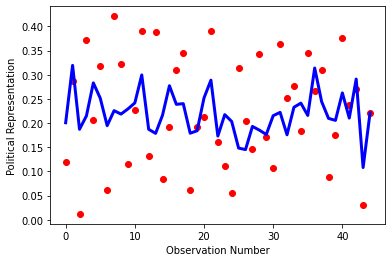

In [382]:
#generate predictions
lm_19_predictions = lm_19.predict(x_19_scaled_test)
rmse_2 = mean_squared_error(y_19_test,lm_19_predictions,squared=False)
mae_2 = mean_absolute_error(y_19_test,lm_19_predictions)
print("RMSE:",rmse_2,"\nMAE:",mae_2)

#plot predicted vs. actual
plt.plot(y_19_test.values, 'ro')
plt.plot(lm_19_predictions, color='blue', linewidth=3)
plt.xlabel('Observation Number')
plt.ylabel('Political Representation')
plt.show()

The MAE for the test set only increased slightly for this model to 8.7pts. This may indicate that the model is not overfitted to the training set. Additionally, the plot indicates that there are quite a few observations where the predicted values intersect or approach the real values.

#### Ridge Regression Predictions
Because the Ridge Regression formula contains a regularization parameter (alpha) that can affect the model's performance, we want to optimize this value. First I will create an array of sample alphas on a logarithmic scale.

In [383]:
alphas_rr = np.logspace(-2,1,5)
print(alphas_rr)

[ 0.01        0.05623413  0.31622777  1.77827941 10.        ]


Next, I will leverage the Ridge Regression cross-validation function from sci-kit learn that will test all of these sample alpha values and find the one with the best peformance. I will do this for the 2014 dataset first.

In [384]:
from sklearn.linear_model import RidgeCV
clf_14 = RidgeCV(alphas = alphas_rr).fit(x_14_scaled_train,y_14_train)
alpha_14 = clf_14.alpha_
print("Optimal alpha:",alpha_14)
print("Intercept:",clf_14.intercept_)
print("Coefficients:",clf_14.coef_)
print("R-squared:",clf_14.score(x_14_scaled_train,y_14_train))

Optimal alpha: 10.0
Intercept: 0.23818181818181813
Coefficients: [ 0.03641788  0.00662565 -0.01001947 -0.01530025]
R-squared: 0.2783842864721572


10 appears to be the optimal alpha value for the 2014 Ridge Regression model, so I will proceed to train the model with this value.

RMSE: 0.10862377085420143 
MAE: 0.09373394553304425


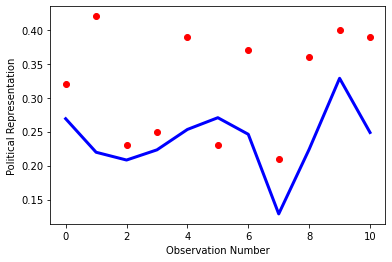

In [385]:
#train model and generate predictions
rr_14 = Ridge(alpha=alpha_14).fit(x_14_scaled_train,y_14_train)
rr_14.score(x_14_scaled_train,y_14_train)
rr_14_predictions = rr_14.predict(x_14_scaled_test)
rmse_rr = mean_squared_error(rr_14_predictions,y_14_test,squared=False)
mae_rr = mean_absolute_error(rr_14_predictions,y_14_test)
print("RMSE:",rmse_rr,"\nMAE:",mae_rr)

#plot predicted vs. actual
plt.plot(y_14_test.values, 'ro')
plt.plot(rr_14_predictions, color='blue', linewidth=3)
plt.xlabel('Observation Number')
plt.ylabel('Political Representation')
plt.show()

The MAE of the Ridge regression model (9.37 pts average error) indicates slightly better performance than the OLS model for the same dataset (9.43 pts).

Next, I will repeat the previous steps for the 2019 dataset.

In [386]:
clf_19 = RidgeCV(alphas = alphas_rr).fit(x_19_scaled_train,y_19_train)
print("Optimal alpha:",clf_19.alpha_)
print("Intercept:",clf_19.intercept_)
print("Coefficients:",clf_19.coef_)
print("R-squared:",clf_19.score(x_19_scaled_train,y_19_train))

Optimal alpha: 10.0
Intercept: 0.2204148148148148
Coefficients: [-0.00920231 -0.01104165 -0.02864905 -0.01593624  0.00724662]
R-squared: 0.15554624760025004


10 appears to be the optimal alpha value for the 2019 dataset as well.

Now I will train the Ridge regression model with the optimal alpha and generate test predictions.

RMSE: 0.10187269389484901 
MAE: 0.08727709034209966


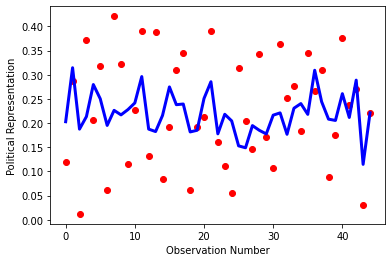

In [387]:
#train model and generate predictions
rr_19 = Ridge(alpha=clf_19.alpha_).fit(x_19_scaled_train,y_19_train)
rr_19_predictions = rr_19.predict(x_19_scaled_test)
rmse_rr_2 = mean_squared_error(rr_19_predictions,y_19_test,squared=False)
mae_rr_2 = mean_absolute_error(rr_19_predictions,y_19_test)
print("RMSE:",rmse_rr_2,"\nMAE:",mae_rr_2)

#plot predicted vs. actual
plt.plot(y_19_test.values, 'ro')
plt.plot(rr_19_predictions, color='blue', linewidth=3)
plt.xlabel('Observation Number')
plt.ylabel('Political Representation')
plt.show()

The Ridge regression performance for the 2019 dataset is comparable to that of the OLS regression. The MAE here is 8.727 pts compared to the OLS MAE of 8.730 pts, so the Ridge performance is only minimally better.

#### 2014 Models Comparison
Now that I have gone through the modeling process for both OLS and Ridge regressions, I would like to compare the results of both approaches.

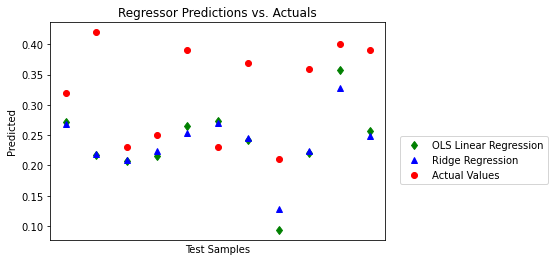

OLS MAE: 0.09431214473982924
RR MAE: 0.09373394553304425
Difference: 0.0005781992067849934


In [388]:
plt.figure()
plt.plot(lm_14_test_predictions, 'gd', label='OLS Linear Regression')
plt.plot(rr_14_predictions, 'b^', label='Ridge Regression')
plt.plot(y_14_test.values, 'ro', label='Actual Values')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Predicted')
plt.xlabel('Test Samples')
plt.legend(bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.title('Regressor Predictions vs. Actuals')

plt.show()

print("OLS MAE:",mae)
print("RR MAE:",mae_rr)
print("Difference:",mae-mae_rr)

Although the MAE was minimimized by the Ridge regression model, predictions were still incorrect by an average of 9.4 pts, which is significant considering the mean value of Political Representation in 2014 was 0.26. This means that the average error was 36% off from the mean true value.

#### 2019 Model Comparison

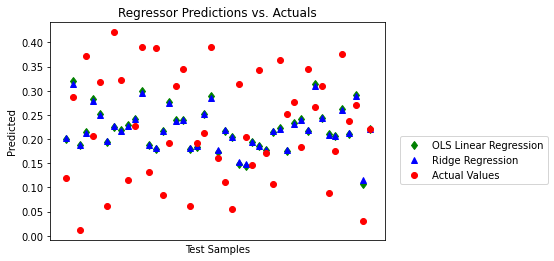

OLS MAE: 0.08730326661586982
RR MAE: 0.08727709034209966
Difference: 2.6176273770162073e-05


In [389]:
plt.figure()
plt.plot(lm_19_predictions, 'gd', label='OLS Linear Regression')
plt.plot(rr_19_predictions, 'b^', label='Ridge Regression')
plt.plot(y_19_test.values, 'ro', label='Actual Values')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Predicted')
plt.xlabel('Test Samples')
plt.legend(bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.title('Regressor Predictions vs. Actuals')

plt.show()

print("OLS MAE:",mae_2)
print("RR MAE:",mae_rr_2)
print("Difference:",mae_2-mae_rr_2)

The MAE reduction by the Ridge regression model was more subtle for the 2019 dataset. Both models resulted in a mean average error of 8.7 points. This means that the average error was nearly 38% off from the mean true value for 2019 (0.23).

<span id="discussion"/>

## Discussion
Counter to what I would have expected, most of the correlations in my descriptive analysis were weak (all with an absolute value of under 0.5). Additionally while the Ridge Regression model performed slightly better than OLS with respect to MAE and RMSE, the overall predictive power and goodness of fit (R-squared) was low (less than 0.3). However, female share of board seats and reproductive autonomy were the most statistically significant variables across both analyses; the former had a correlation of 0.47 and a p-value of 0.004, while the latter exhibited  correlation of -0.3 and a p-value of 0.01

Given the weak correlations exhibited in the descriptive analysis and the poor predictive abilities of multiple regression models, I was unable to support my original hypothesis: **countries with better performance across key gender parity indicators are more likely to have greater representation of women in politics.** 

### Limitations
It is important to recognize several limitations that constrained my analysis. First, the Employment data used in the 2014 model only contained observations for OECD countries, which make up roughly one quarter of all countries. Therefore, the findings may not be globally representative. Additionally, due to missing values, I created imputed values which may have skewed the data. Finally, the observations in my datasets represent a specific snapshot in time, so the findings may not be reflective of trends taking place over a longer range of time.


### Opportunities for Future Work
I believe there is value in repeating this analysis with datapoints from additional years and comparing results over time. Ideally, I would leverage both the Employment dataset features with the GID-DB features in one model to understand how employment indicators interact with socio-economic features. Additionally, there may be value in applying unsupervised methods like clustering to see if any distinct patterns emerge. Lastly, leveraging boosting models like LS boost may improve the regression predictions.

### Implications
Although I was unable to support my hypothesis, the literature is clear that gaps in gender parity comprise at least some of the factors that prevent women from running for political office at the same rate as men. However, given the unique political and cultural landscapes that exist within each country, a model may not be able to adequately reflect such nuances. It may be necessary to incorporate additional features like the type of representation system (i.e. proportional or electoral) and if gender quotas exist. One takeaway is clear: more investigation must take place to better understand the relationships between gender parity indicators and women's political representation.

<a name="conclusion"/>

## Conclusion
In this analysis, I leveraged descriptive and predictive analysis techniques to answer the research question: **what factors are associated with countries with greater representation of women politics?** I explored relationships between key gender parity indicators in the workplace, law, and society and the rate of women's political representation in national legislative bodies. Although I did not find sufficient evidence to indicate a strong relationship between these indicators and women's political representation, gender parity in all arenas is critical for the advancement of women. We must continue to investigate obstacles preventing women’s participation to ensure that they have a seat at the policy-making table and are able to represent the interests of all constituents.
